In [1]:
import warnings
import pandas as pd
import sweetviz as sv
from sqlalchemy import create_engine

from sql.postgres_connection import (dbname, password, host, port, database)
from sql.comprasgov_modo_disputa_obras_sql import (full_sql_query)

# Suppress FutureWarning from sweetviz
warnings.simplefilter(action='ignore', category=FutureWarning)

c:\Users\Hugo\miniconda3\envs\comprasgov\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Database Connection Function
def read_data_from_postgres(query):
    try:
        engine = create_engine(f'postgresql://{dbname}:{password}@{host}:{port}/{database}')
        df = pd.read_sql_query(query, engine)
        
    except Exception as e:
        print("An error occurred:", e)
        
    return df

# Test Connection
df = read_data_from_postgres(full_sql_query)

df_original = df.copy()
df

,link,codcompra,coditem,codigolicitacao,codigoitemlicitacao,numerouasgorigem,numerouasgresponsavel,numerolicitacao,anolicitacao,mododisputa,...,numeroitem,quantidade,quantidadeconsistente,codigosituacaoitemlicitacao,subcontratacao,codigotipoitem,utilizamargempreferencia,valorestimado,datahoraregistrolicitacao,datahoraregistroitem
0,https://compras.dados.gov.br/licitacoes/doc/rd...,17908599000752023,1790859900075202300001,9268,13106,179085,179085,00075,2023,Aberto,...,1,1,T,1,T,2,F,2.075558e+08,2023-09-26 17:21:12.562577,2021-11-17 13:08:34.446373
1,https://compras.dados.gov.br/licitacoes/doc/rd...,39301899001382023,3930189900138202300001,8772,12638,393018,393018,00138,2023,Aberto,...,1,1,T,1,T,2,F,3.342747e+06,2023-03-29 14:23:28.491598,2021-10-20 10:30:11.566951
2,https://compras.dados.gov.br/licitacoes/doc/rd...,92589499000112023,9258949900011202300001,9279,11995,925894,925894,00011,2023,Fechado,...,1,1,T,1,F,2,F,1.155054e+06,2023-09-29 08:59:10.238827,2021-08-05 17:44:49.918588
3,https://compras.dados.gov.br/licitacoes/doc/rd...,19500599000332023,1950059900033202300009,9276,11993,195005,195005,00033,2023,Aberto,...,9,1,T,1,T,2,F,2.333230e+05,2023-09-28 18:05:13.549244,2021-08-05 11:49:51.857516
4,https://compras.dados.gov.br/licitacoes/doc/rd...,19500599000332023,1950059900033202300008,9276,11992,195005,195005,00033,2023,Aberto,...,8,1,T,1,T,2,F,2.333230e+05,2023-09-28 18:05:13.549244,2021-08-05 11:46:26.595748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4345,https://compras.dados.gov.br/licitacoes/doc/rd...,39301399001722012,3930139900172201200001,10,10,393013,393013,00172,2012,Fechado/Aberto,...,1,1,T,1,F,2,F,1.705994e+08,2014-11-01 10:26:38.600225,2014-11-01 10:26:38.445144
4346,https://compras.dados.gov.br/licitacoes/doc/rd...,27507599000012012,2750759900001201200001,8,8,275075,275075,00001,2012,Fechado,...,1,1,T,1,F,2,F,8.512767e+07,2014-11-01 10:26:38.600225,2014-11-01 10:26:38.445144
4347,https://compras.dados.gov.br/licitacoes/doc/rd...,39301599005072012,3930159900507201200001,6,6,393015,393015,00507,2012,Fechado/Aberto,...,1,25,T,1,F,2,F,1.000000e-02,2014-11-01 10:26:38.600225,2014-11-01 10:26:38.445144
4348,https://compras.dados.gov.br/licitacoes/doc/rd...,39301399001822012,3930139900182201200001,5,5,393013,393013,00182,2012,Fechado/Aberto,...,1,1,T,1,F,2,F,1.560000e+08,2014-11-01 10:26:38.600225,2014-11-01 10:26:38.445144


In [3]:
df.dtypes

link                                   object
codcompra                              object
coditem                                object
codigolicitacao                         int64
codigoitemlicitacao                     int64
numerouasgorigem                        int64
numerouasgresponsavel                   int64
numerolicitacao                        object
anolicitacao                           object
mododisputa                            object
criteriojulgamento                     object
codigomododisputa                       int64
codigocriteriojulgamento                int64
inversaofases                          object
participacaoconsorcio                  object
codigoitemcatalogo                     object
descricao                              object
numeroitem                              int64
quantidade                              int64
quantidadeconsistente                  object
codigosituacaoitemlicitacao             int64
subcontratacao                    

[Summarizing dataframe]                      |          | [  0%]   00:00 -> (? left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



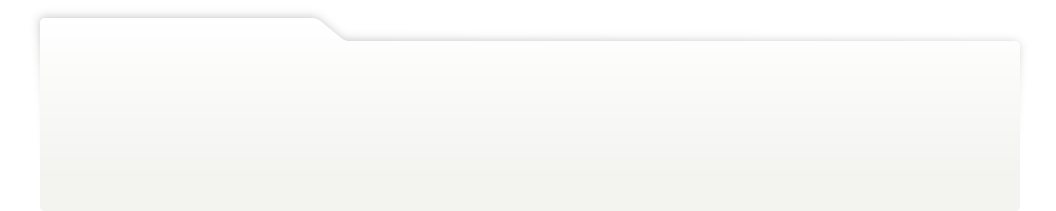
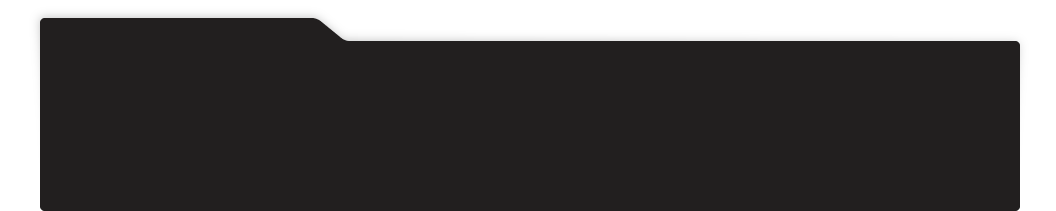
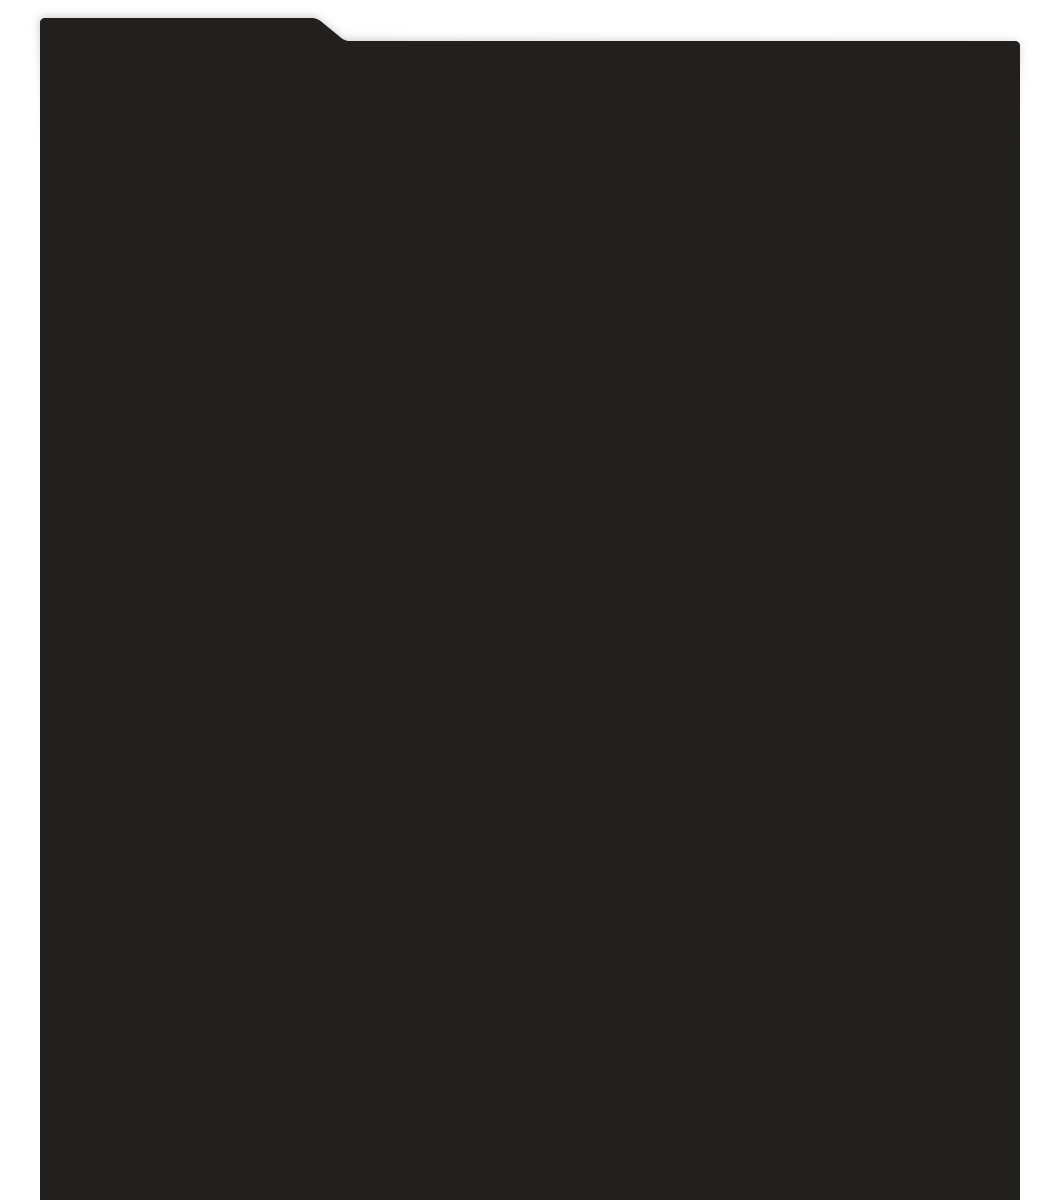
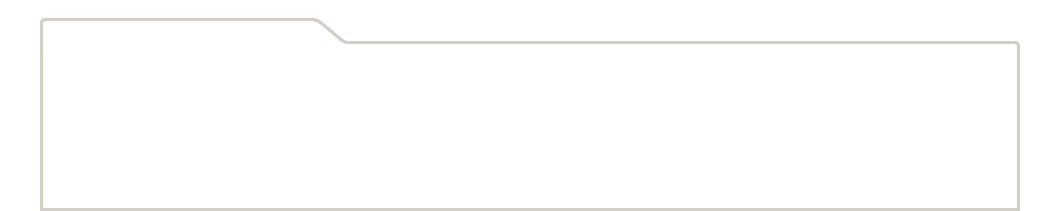
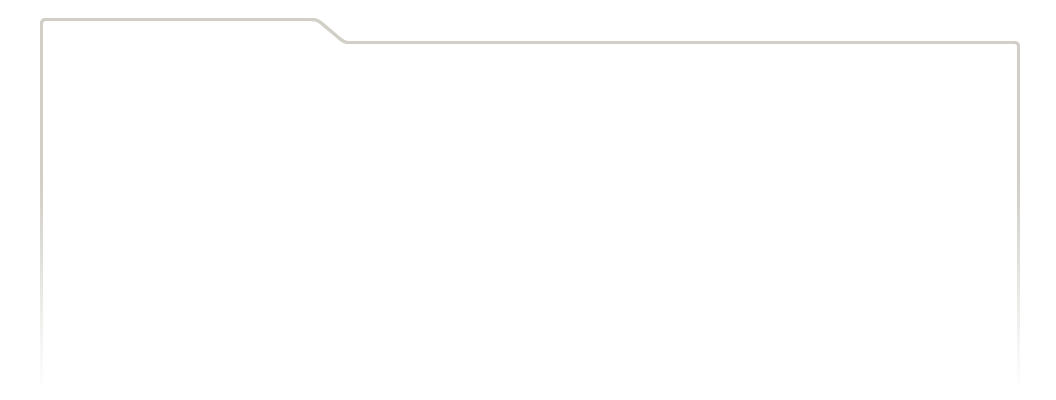
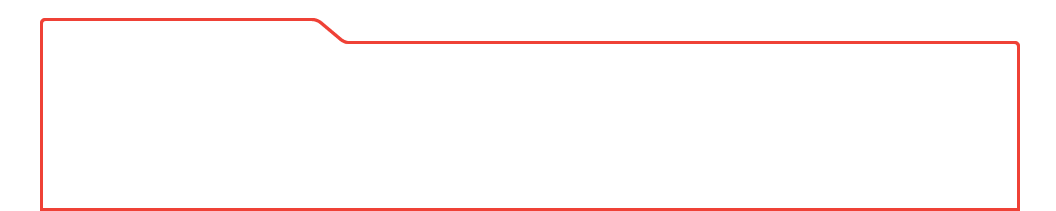
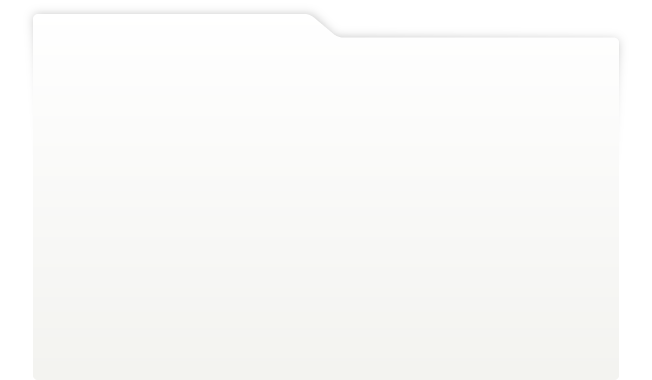
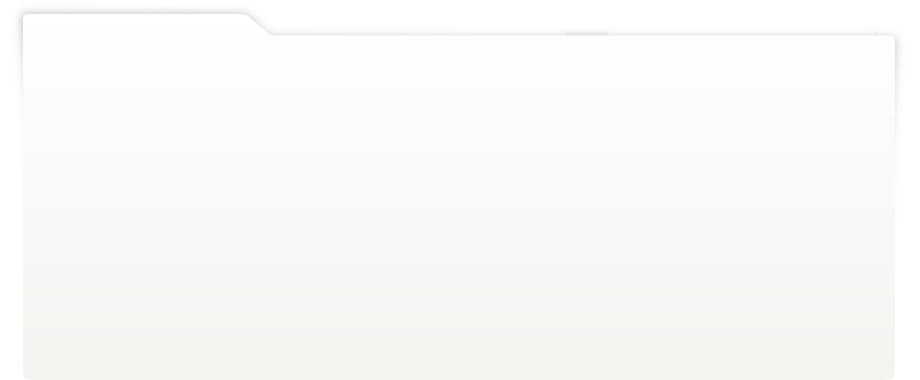
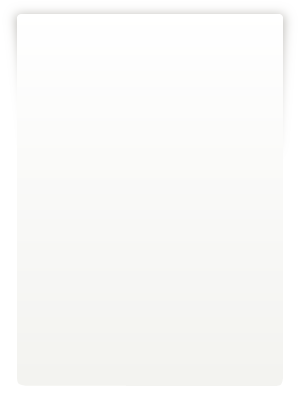
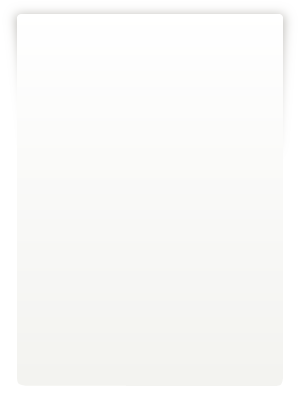
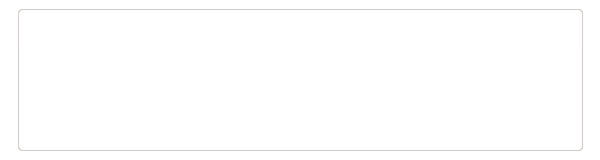
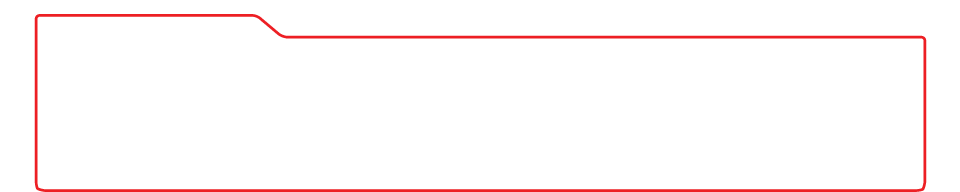
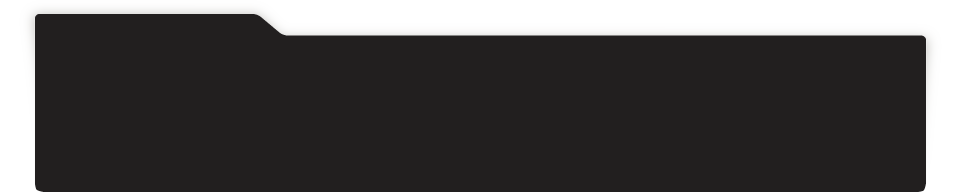
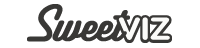
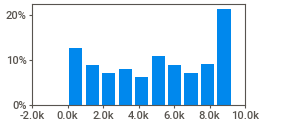
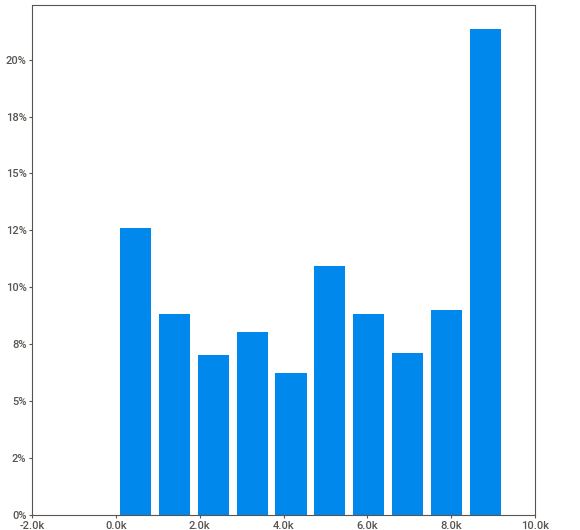
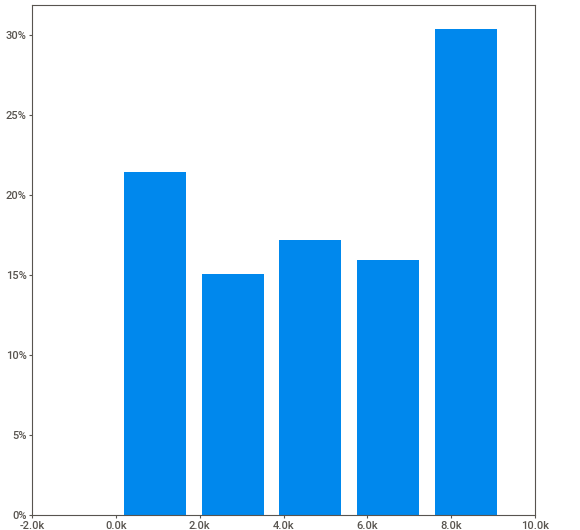
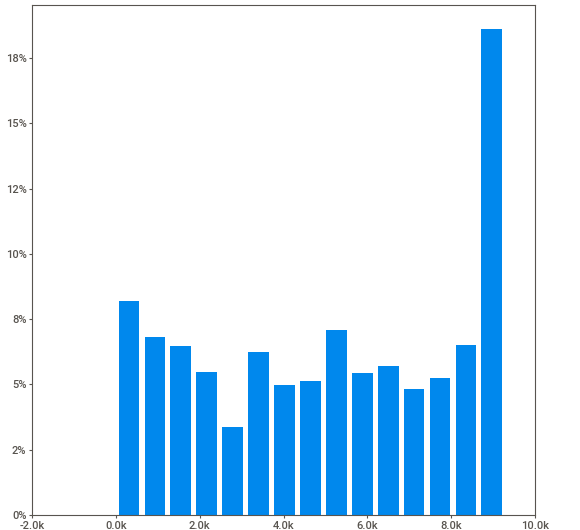
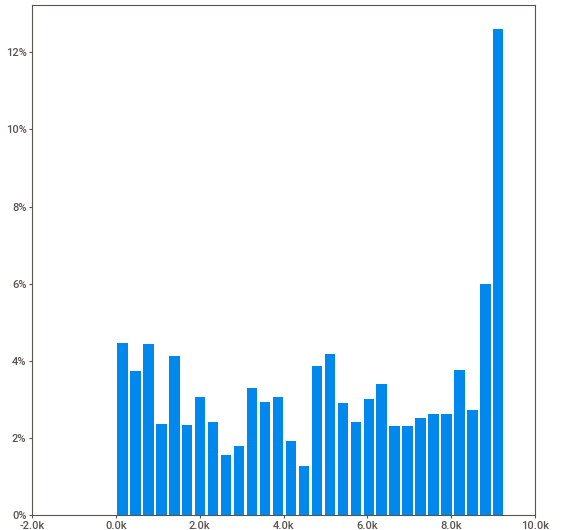
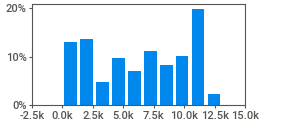
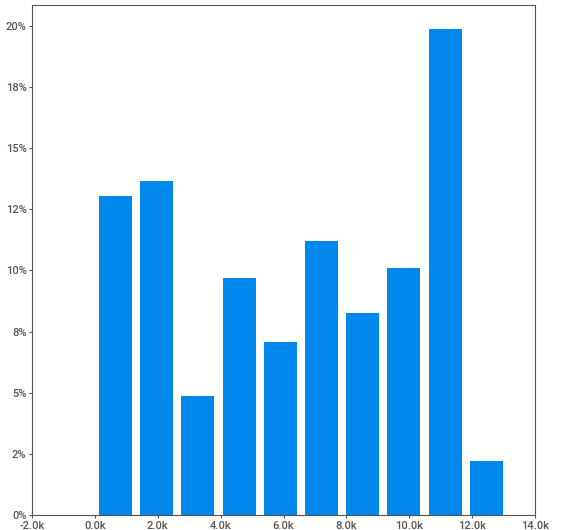
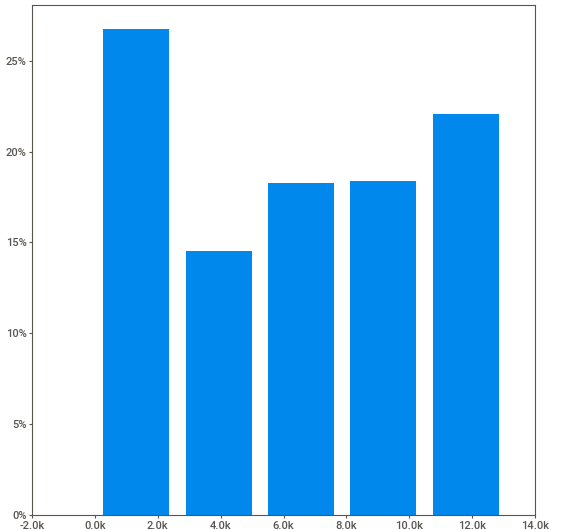
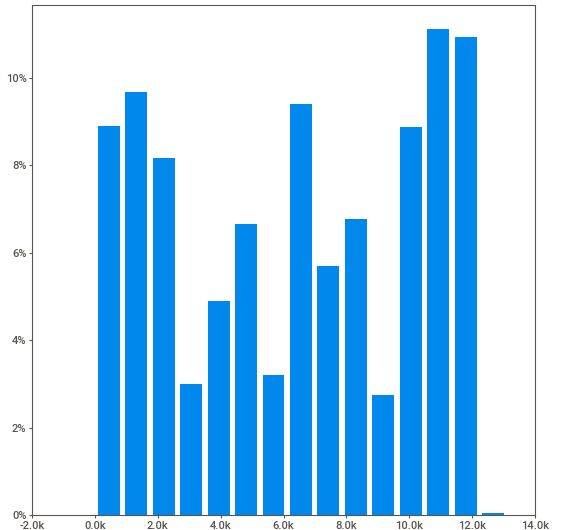
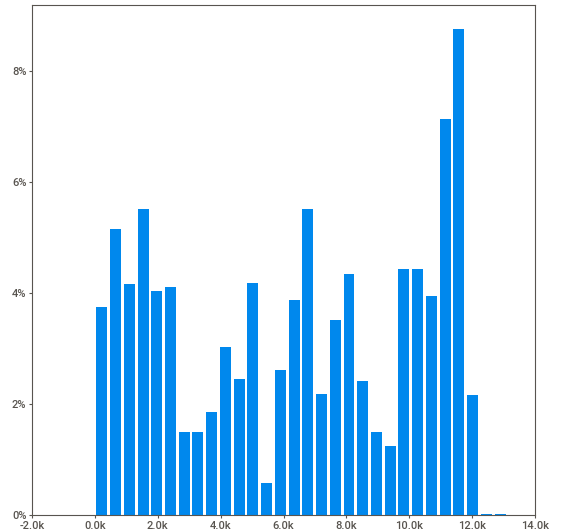
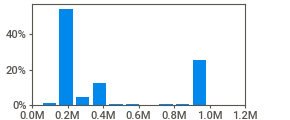
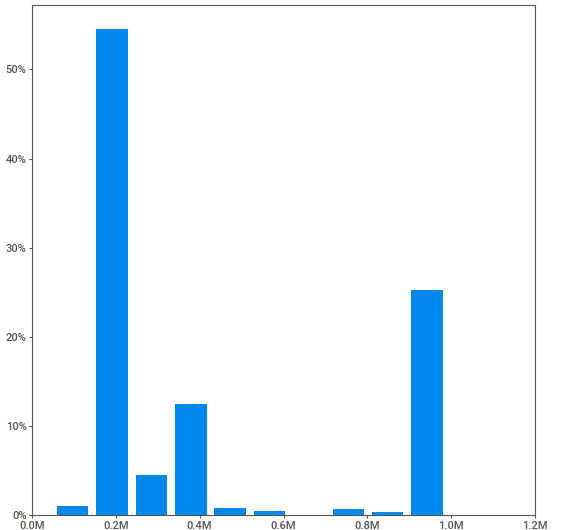
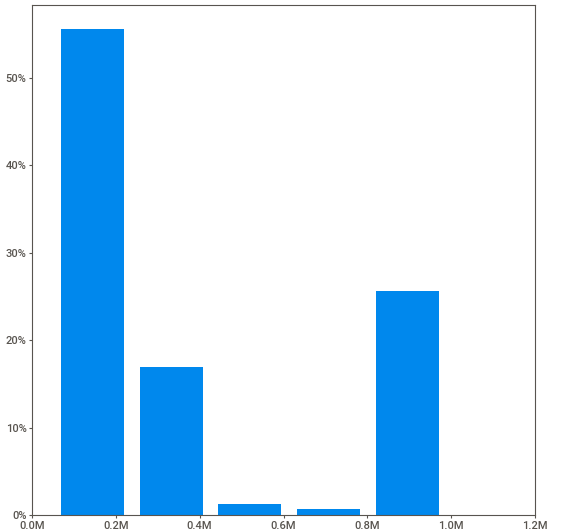
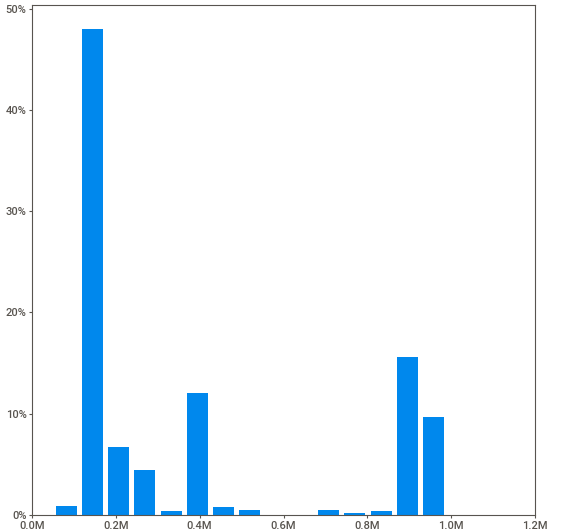
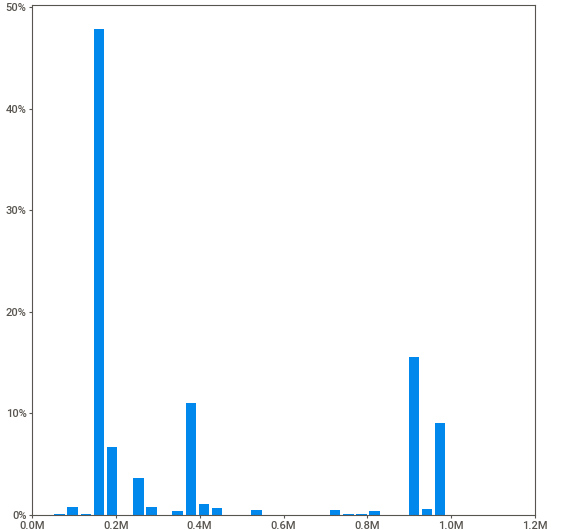
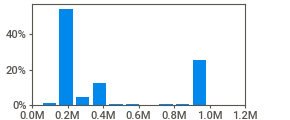
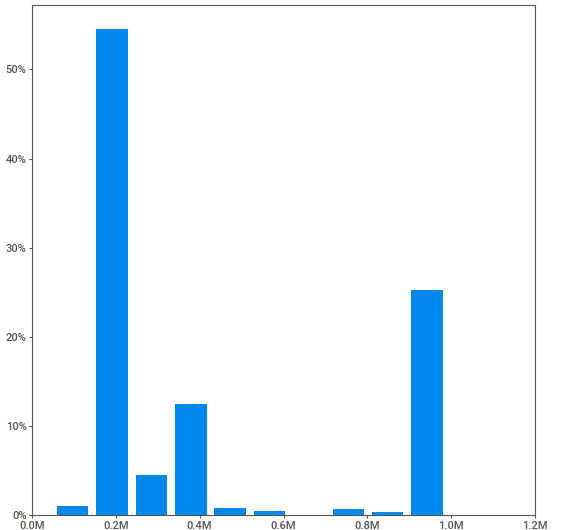
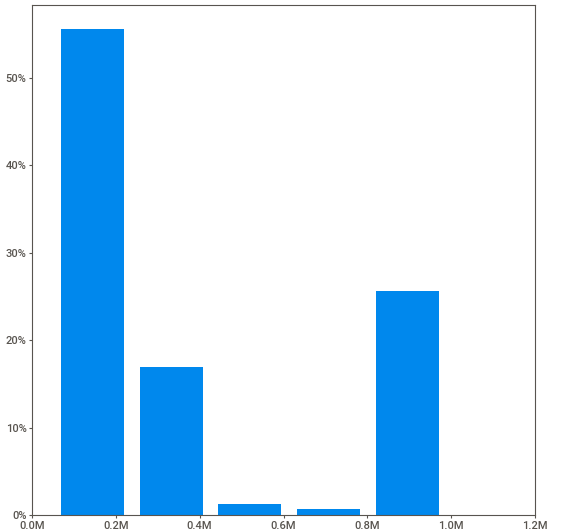
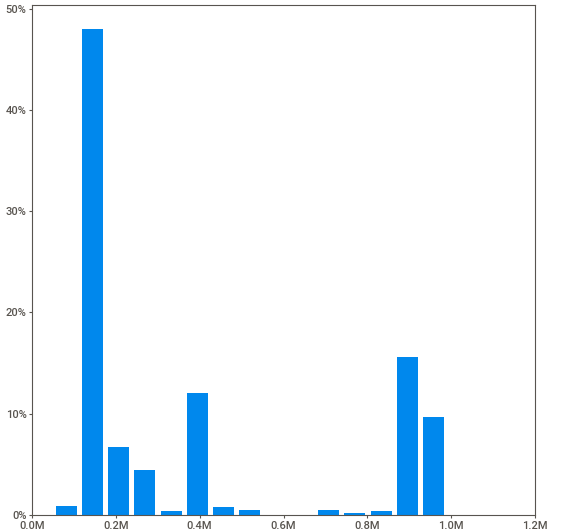
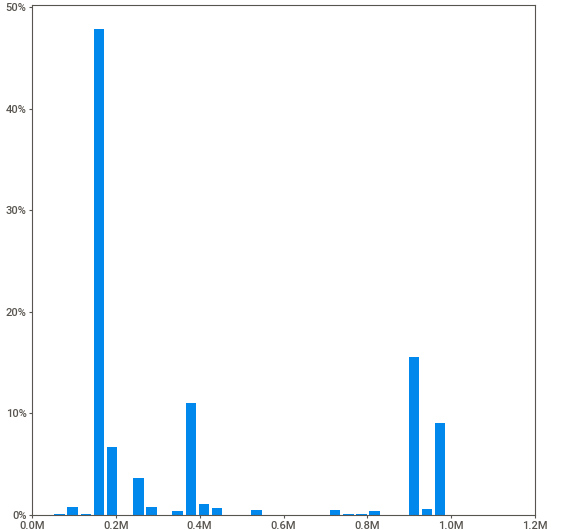
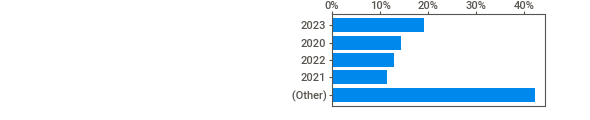
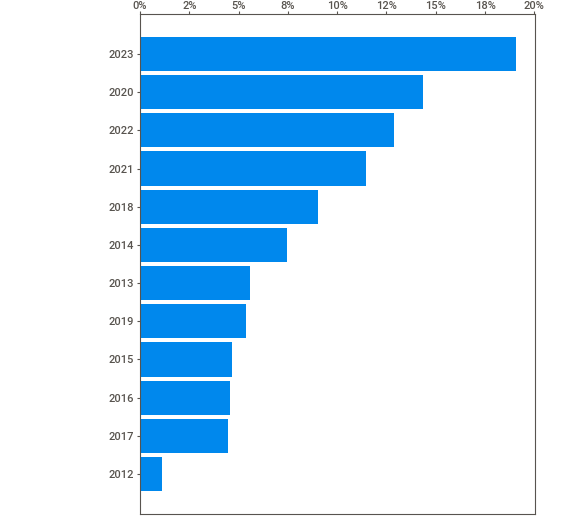
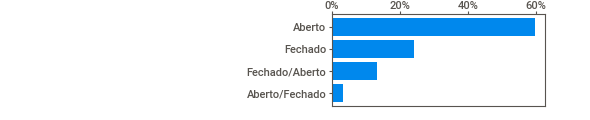
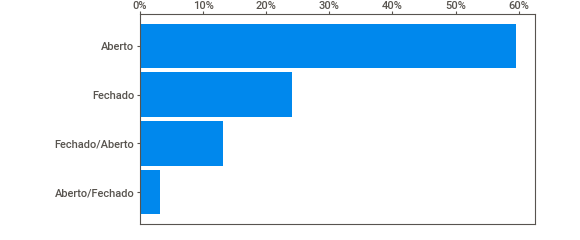
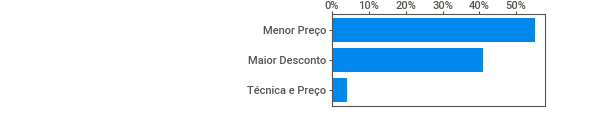
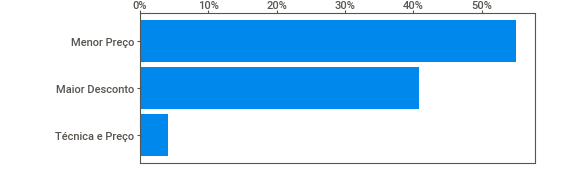
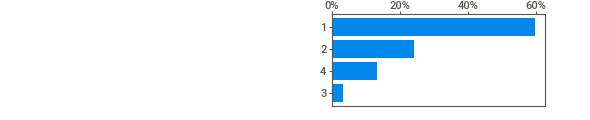
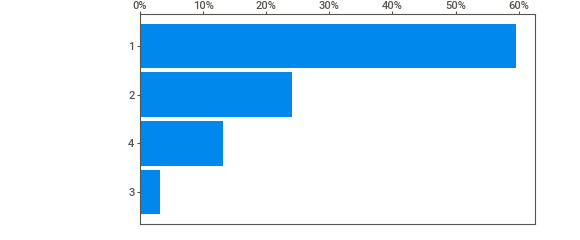
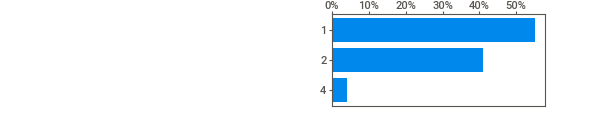
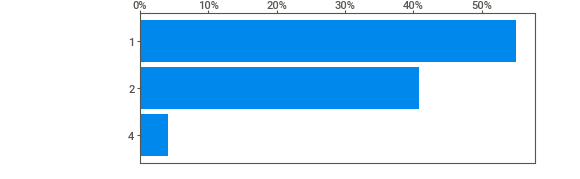
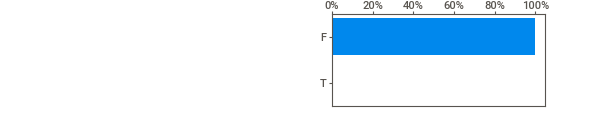
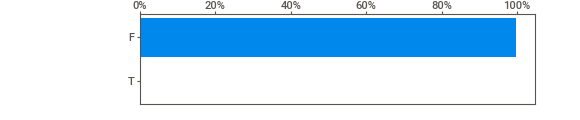
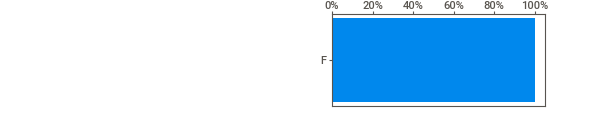
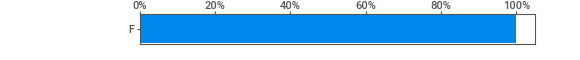
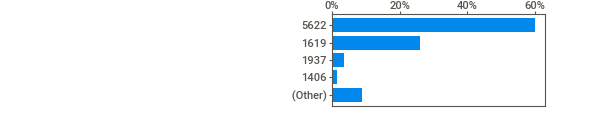
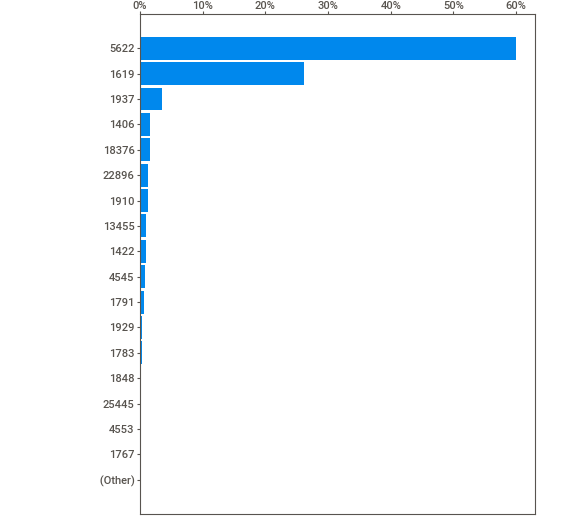
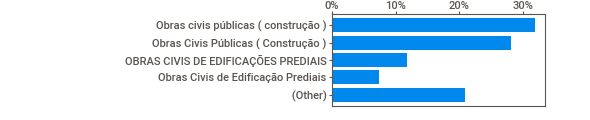
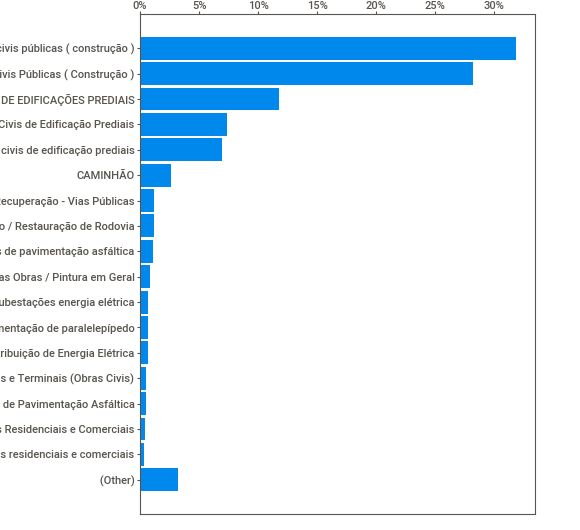
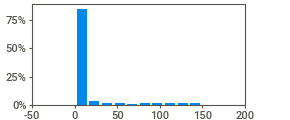
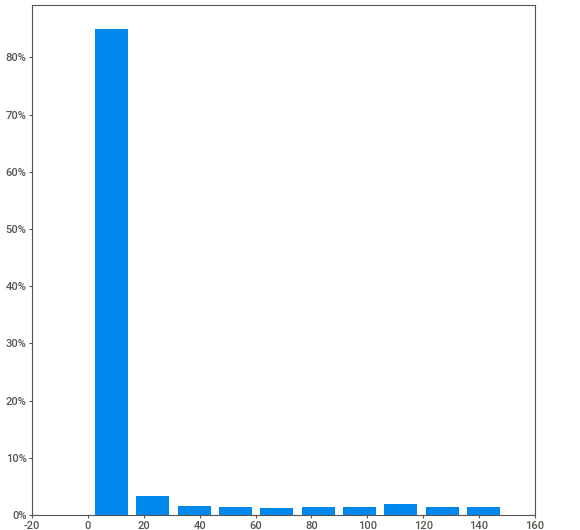
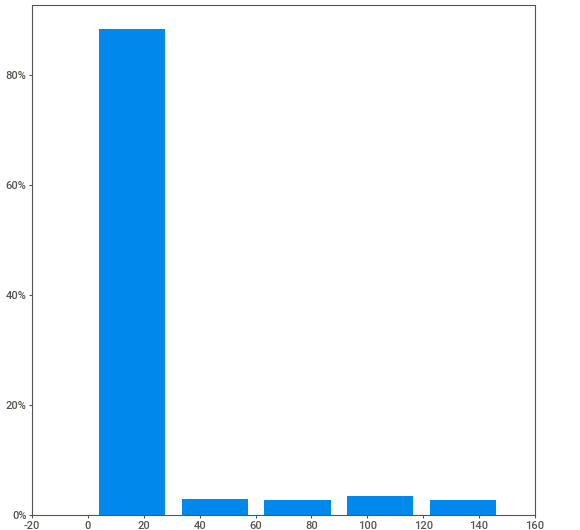
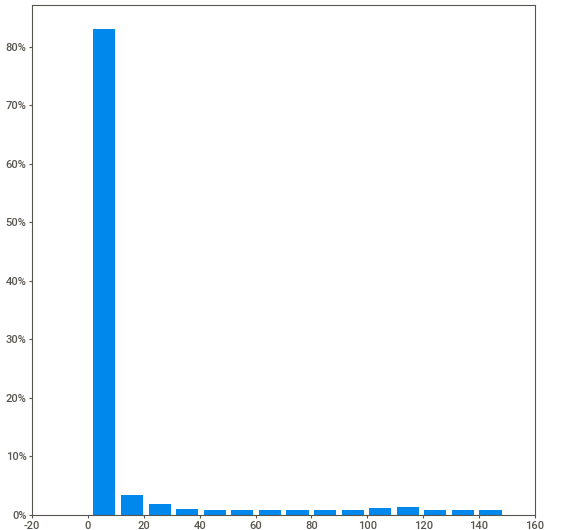
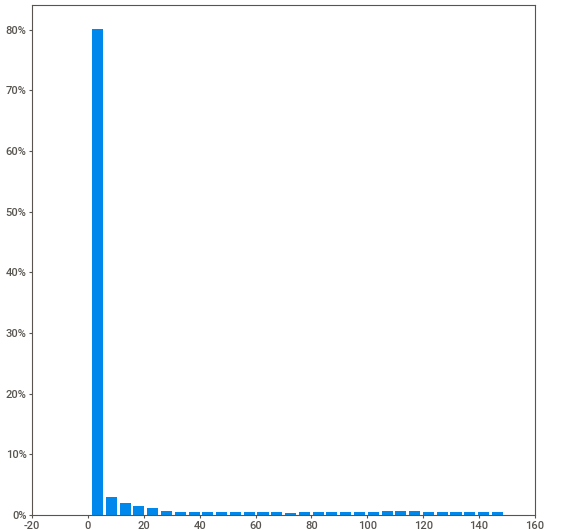
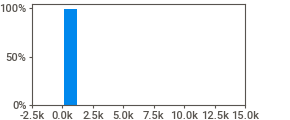
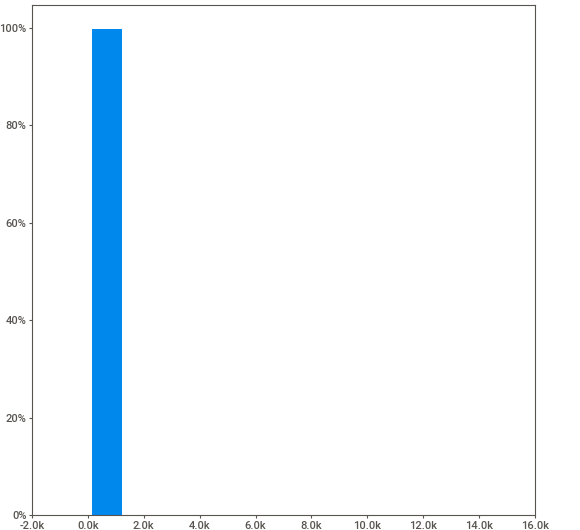
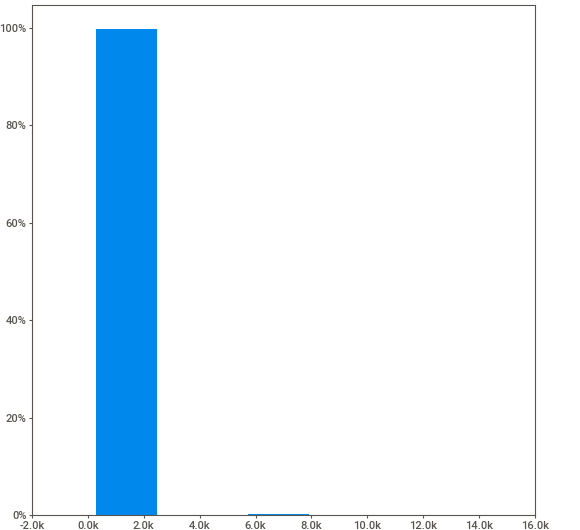
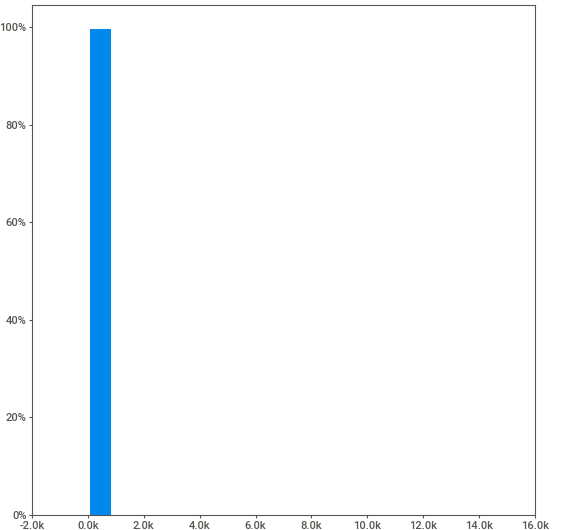
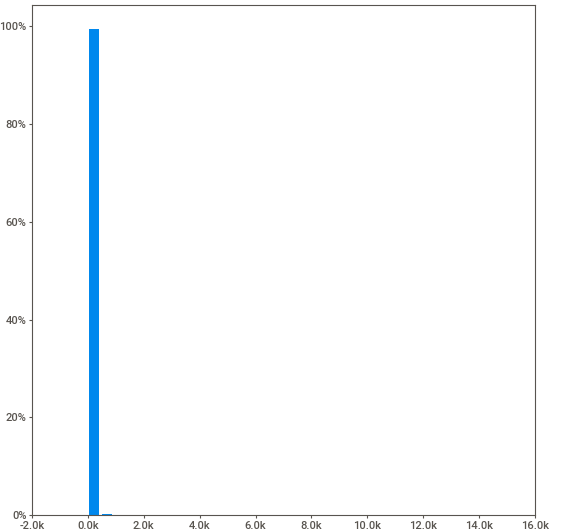
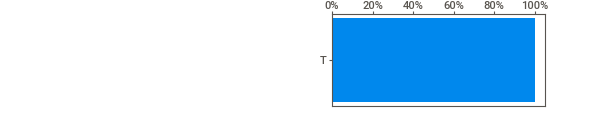
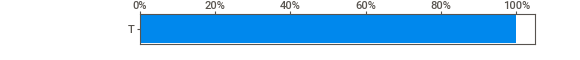
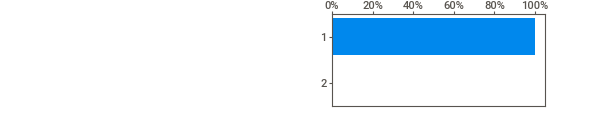
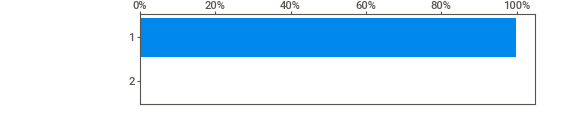
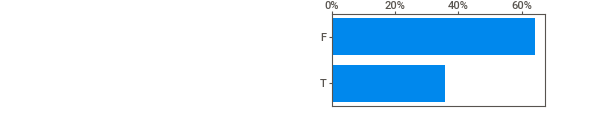
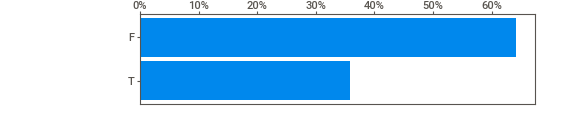
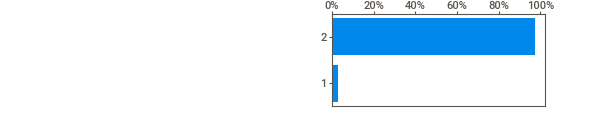
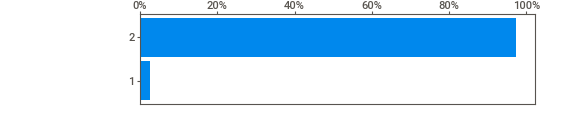
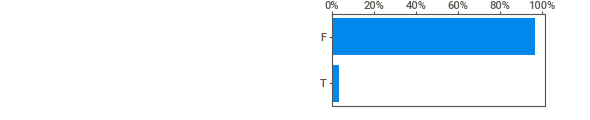
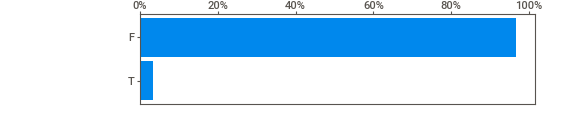
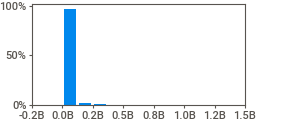
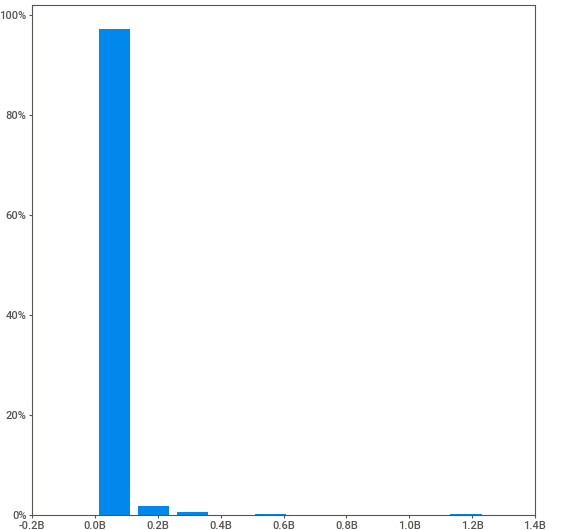
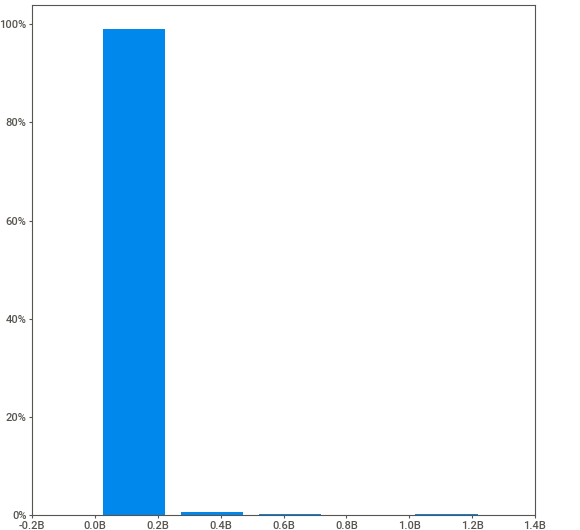
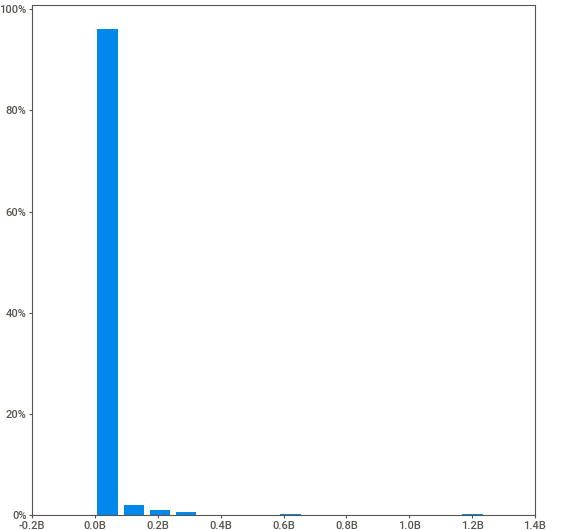
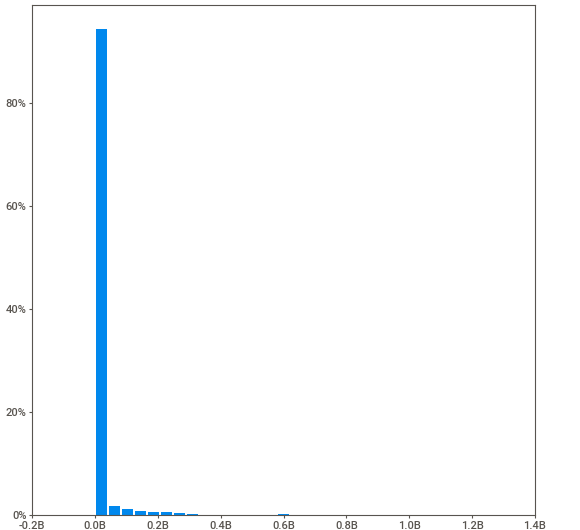
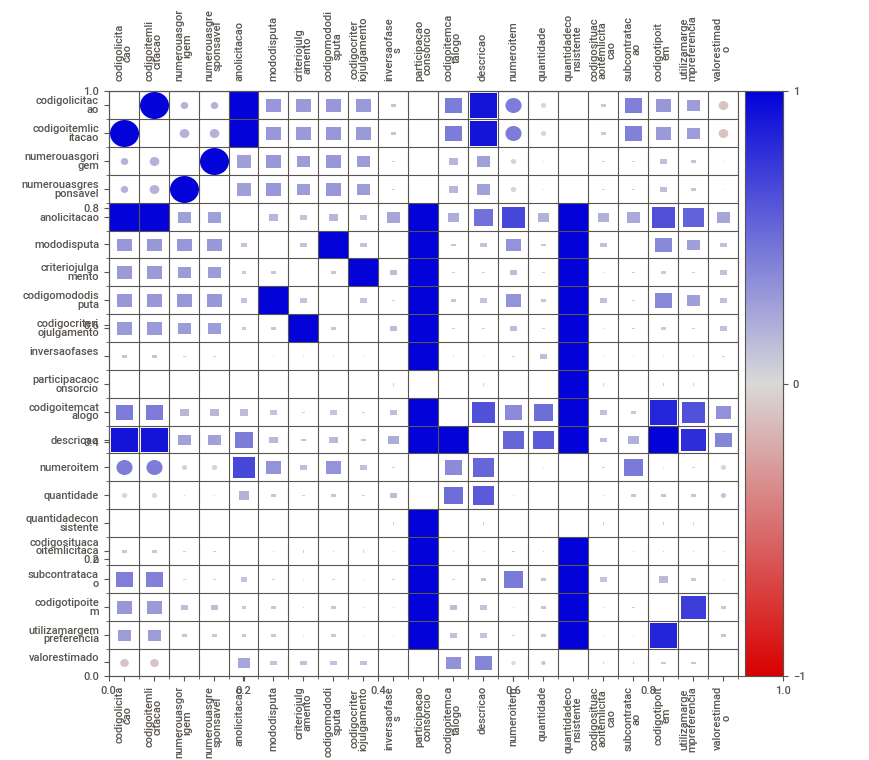
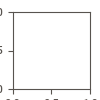

In [5]:
# SweetViz Setup
# target_feature ='mododisputa'
my_report = sv.analyze(df, target_feat=None)

# Export Report to HTML
# my_report.show_html(filepath='sweetviz_report_v3.html', 
#                     open_browser=True, 
#                     layout='vertical', 
#                     scale=None)
                    
# # Print Report to Notebook
my_report.show_notebook(w="100%",
                        h=None, 
                        scale=None, 
                        layout='vertical',
                        filepath=None)